In [2]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

import imutils
import cv2

## This code is to test how much PACBED/CBED changes with defocus

## Test 1: roughly test how much CBED/PACBED changes with 10nm focus step

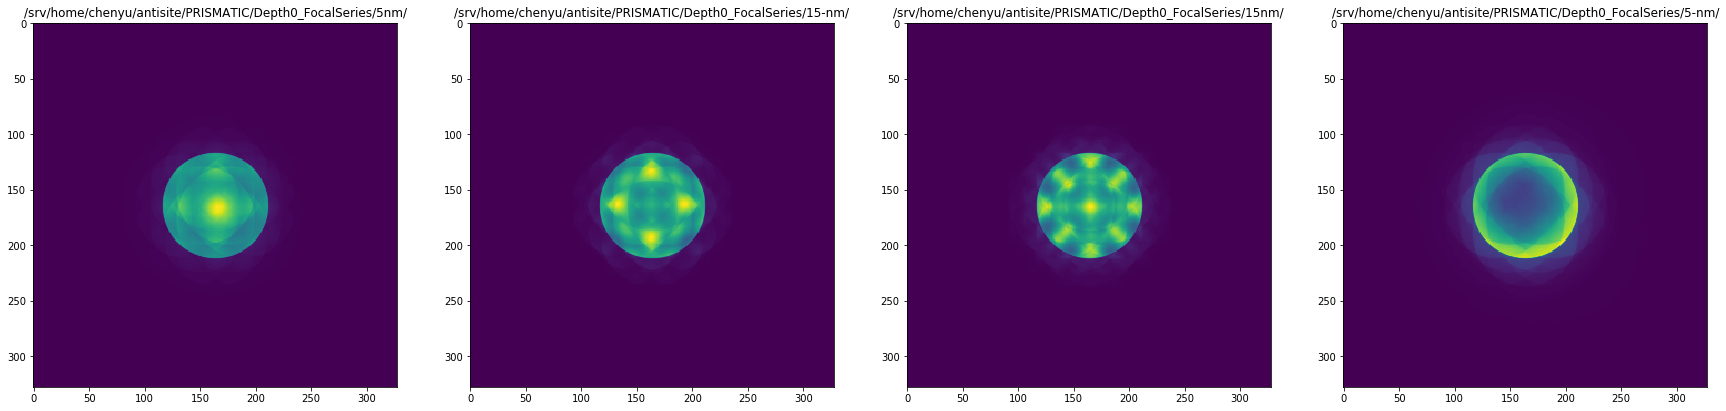

In [11]:
# Case for one single CBED
path = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/*/'
folder_list = glob.glob(path)
fig, ax = subplots(1,len(folder_list),figsize=(30, 10))
for i in range(len(folder_list)):
    sim_cube = np.load(folder_list[i]+'depth0_slice8_90pmss.npy')
    ax[i].imshow(sim_cube[10,10,:,:])
    ax[i].set_title(folder_list[i])
    

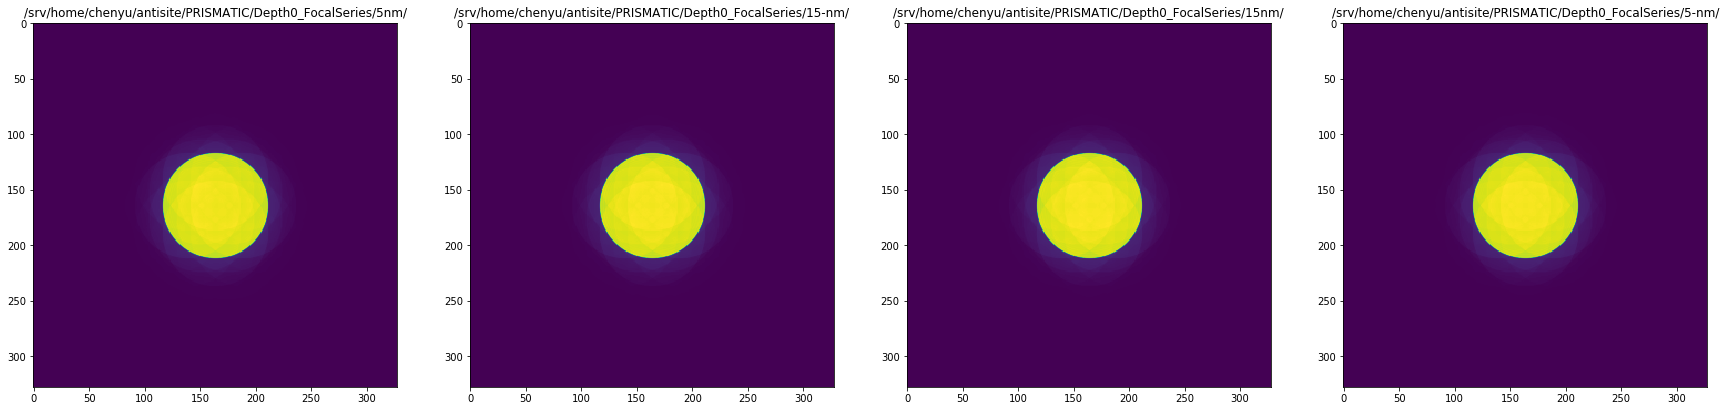

In [14]:
# Case for whole UC PACBED
path = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/*/'
folder_list = glob.glob(path)
fig, ax = subplots(1,len(folder_list),figsize=(30, 10))

for i in range(len(folder_list)):
    sim_cube = np.load(folder_list[i]+'depth0_slice8_90pmss.npy')

    expMask = np.zeros((69,69))
    expMask[21:43,22:44] = 1
    px_list = np.nonzero(expMask)
    row_list = px_list[0]
    col_list = px_list[1]
    file_list= row_list*69+col_list+1
    PACBED_sim = np.zeros((328,328))
    
    for ifile in range(file_list.size):
        frame = sim_cube[row_list[ifile],col_list[ifile],:,:]
        PACBED_sim = PACBED_sim + frame
    
    ax[i].imshow(PACBED_sim)
    ax[i].set_title(folder_list[i])

In [5]:
folder_list[i]

'/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/5-nm/'

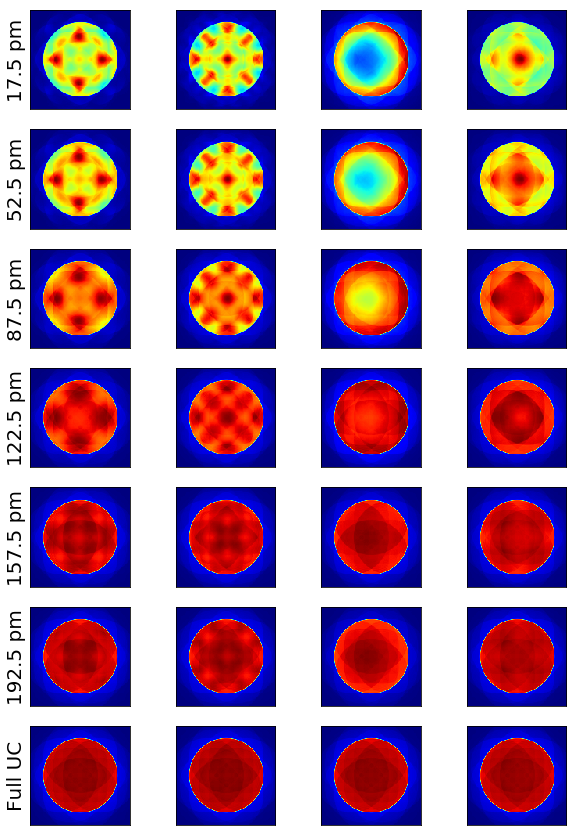

In [7]:
# Case for whole UC PACBED
path = '/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/*5*/'
folder_list = glob.glob(path)
folder_list = sort(folder_list)
radius_list = [1,3,5,7,9,11]
fig = plt.figure(figsize=(10,15))
# fig.subplots_adjust(wspace=None,hspace=None)

# Subplot combinations of defocus and integration radius
for i in range(len(folder_list)):
    sim_cube = np.load(folder_list[i]+'depth0_slice8_90pmss.npy')
    
    for r in range(len(radius_list)):
        radius = radius_list[r]
        expMask = create_circular_mask(radius*2+1,radius*2+1,center=[radius,radius])
        px_list = np.nonzero(expMask)

        row_list = px_list[0] + 32 - radius
        col_list = px_list[1] + 33 - radius
        file_list= row_list*69+col_list+1
        PACBED_sim = np.zeros((328,328))

        for ifile in range(file_list.size):
            frame = sim_cube[row_list[ifile],col_list[ifile],:,:]
            PACBED_sim = PACBED_sim + frame

        fig.add_subplot(len(radius_list)+1,len(folder_list),r*len(folder_list)+i+1)
        fig.subplots_adjust(wspace=None,hspace=None)
        plt.imshow(PACBED_sim[100:228,100:228],cmap = plt.get_cmap('jet'))
        plt.xticks([])
        plt.yticks([])
        if i == 0:
            plt.ylabel(str((radius_list[r])*17.5) + ' pm',fontsize = 20)


# Show full unit cell PACBED on last row

for i in range(len(folder_list)):
    sim_cube = np.load(folder_list[i]+'depth0_slice8_90pmss.npy')

    expMask = np.zeros((69,69))
    expMask[21:43,22:44] = 1
    px_list = np.nonzero(expMask)
    row_list = px_list[0]
    col_list = px_list[1]
    file_list= row_list*69+col_list+1
    PACBED_sim = np.zeros((328,328))
    
    for ifile in range(file_list.size):
        frame = sim_cube[row_list[ifile],col_list[ifile],:,:]
        PACBED_sim = PACBED_sim + frame
    
    fig.add_subplot(len(radius_list)+1,len(folder_list),(r+1)*len(folder_list)+i+1)
    fig.subplots_adjust(wspace=None,hspace=None)
    plt.imshow(PACBED_sim[100:228,100:228],cmap = plt.get_cmap('jet'))
    plt.xticks([])
    plt.yticks([])
    
    if i==0:
        plt.ylabel('Full UC',fontsize = 20)
        
plt.show()

In [8]:
folder_list

array(['/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/15-nm/',
       '/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/15nm/',
       '/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/5-nm/',
       '/srv/home/chenyu/antisite/PRISMATIC/Depth0_FocalSeries/5nm/'],
      dtype='<U61')

In [4]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask